# Seismic signal processing

## Filtering

Note: Either download a test mseed file yourself or run the "[Download seismic data](../seismic_waveform)" section first to download the **waveforms.mseed** file

Example from [obspy tutoral](https://docs.obspy.org/tutorial/code_snippets/filtering_seismograms.html):

The following script shows how to filter a seismogram. The example uses a zero-phase-shift low-pass filter with a corner frequency of 1 Hz using 2 corners. This is done in two runs forward and backward, so we end up with 4 corners de facto.

The available filters are: *bandpass, bandstop, lowpass, highpass*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy
# %matplotlib widget

In [2]:
# Read the seismogram
st = obspy.read("waveforms.mseed")
st = st.merge(fill_value=0)

tr = st[0]

# Filtering with a lowpass on a copy of the original Trace
tr_filt = tr.copy()
tr_filt.filter('bandpass', freqmin=1.0, freqmax=5, corners=4, zerophase=True)

CI.FMP..HHE | 2022-06-03T12:05:21.058393Z - 2022-06-03T12:06:21.048393Z | 100.0 Hz, 6000 samples

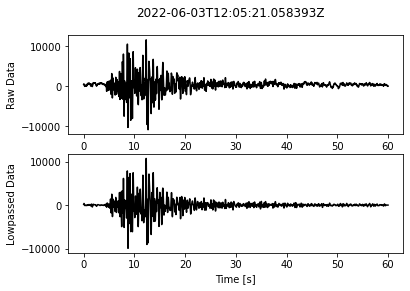

In [3]:
# Now let's plot the raw and filtered data...
t = np.arange(len(tr.data)) * tr.stats.delta
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Raw Data')
plt.subplot(212)
plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Lowpassed Data')
plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()

## Spectrogam 

How to find the proper filtering frequencies? We can take a look at the spectrogram.

- Using Obspy's default function:

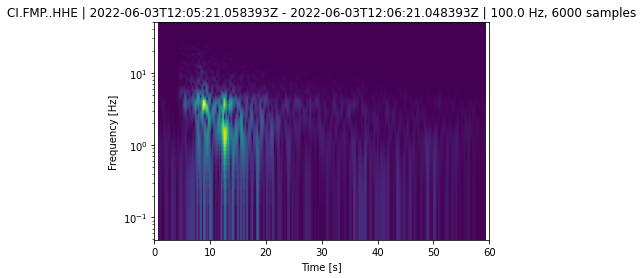

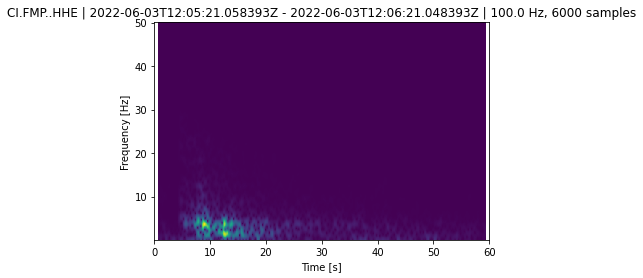

In [4]:

tr.spectrogram(log=True);
tr.spectrogram(log=False);

- Calculate spectrogram using scipy:

In [54]:
import scipy.signal
f_, t_, spectrogram = scipy.signal.stft(tr.data, fs=tr.stats.sampling_rate, nperseg=100, noverlap=80)

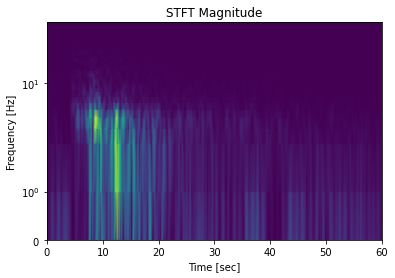

In [55]:
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(t_, f_, np.abs(spectrogram), shading='gouraud')
ax.set_title('STFT Magnitude')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_yscale('symlog')
plt.show(fig)

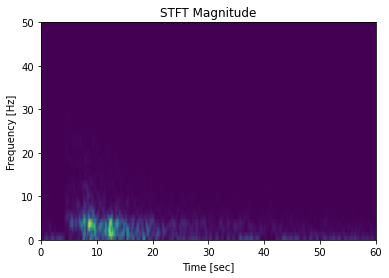

In [56]:
fig, ax = plt.subplots(1, 1)
ax.pcolormesh(t_, f_, np.abs(spectrogram), shading='gouraud')
ax.set_title('STFT Magnitude')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
plt.show(fig)